In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Reviews.csv', on_bad_lines='skip')

In [ ]:
df2=df.copy()
df.head(1000)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
995,996,B006F2NYI2,A1D3F6UI1RTXO0,Swopes,1,1,5,1331856000,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...
996,997,B006F2NYI2,AF50D40Y85TV3,Mike A.,1,1,5,1328140800,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i..."
997,998,B006F2NYI2,A3G313KLWDG3PW,kefka82,1,1,5,1324252800,this sauce is the shiznit,this sauce is so good with just about anything...
998,999,B006F2NYI2,A3NIDDT7E7JIFW,V. B. Brookshaw,1,2,1,1336089600,Not Hot,Not hot at all. Like the other low star review...


In [ ]:
df.shape

(568454, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [ ]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [ ]:
df['Text']

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...
...,...
568449,Great for sesame chicken..this is a good if no...
568450,I'm disappointed with the flavor. The chocolat...
568451,"These stars are small, so you can give 10-15 o..."
568452,These are the BEST treats for training and rew...


we will drop all unnecessary columns

In [ ]:
df.drop(['Id','UserId','ProfileName','HelpfulnessDenominator','HelpfulnessNumerator','Time'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['ProductId', 'Score', 'Summary', 'Text'], dtype='object')

check all null values and duplicates icase there is any and droping them

In [ ]:
df.isna().sum()

,0
ProductId,0
Score,0
Summary,27
Text,0


In [ ]:
df['Summary'].fillna('No Summary', inplace=True)

In [ ]:
df.isna().sum()

,0
ProductId,0
Score,0
Summary,0
Text,0


In [ ]:
df.duplicated().sum()

894

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df['Score'].nunique()

5

In [ ]:
df['Score'].unique()

array([5, 1, 4, 2, 3])

In [ ]:
df['Sentiment'] = df['Score'].map({5: 'Positive', 4: 'Positive', 3: 'Neutral', 2: 'Negative', 1: 'Negative'})

In [ ]:
df['Score'].value_counts()/len(df)*100

,count
Score,
5,63.894390
4,14.200437
1,9.159736
3,7.501762
2,5.243675


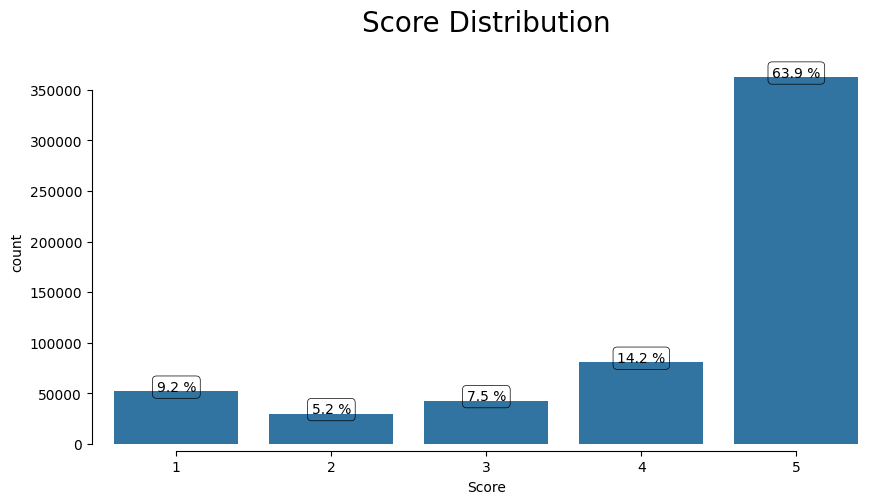

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x=df['Score'])
total=float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 75,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
ax.set_title('Score Distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

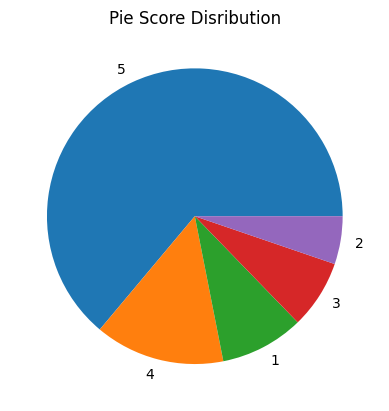

In [ ]:
score_values=df['Score'].value_counts()
plt.pie(score_values,labels=score_values.index)
plt.title('Pie Score Disribution')
plt.show()

:63.5 % of reviews have the score 5 which indicate that high percentage of

---

product reviews are positive.

# Taking Samples from Score Column

In [ ]:
new_df= df.groupby('Score').apply(lambda x: x.sample(10000)).reset_index(drop=True)

In [ ]:
new_df

,ProductId,Score,Summary,Text,Sentiment
0,B0018CLZBW,1,Dog developed GI problems,Our 6-year old Vizsla has been eating Canidae ...,Negative
1,B00004RAMY,1,Very difficult to set,I bought 2 of these traps and spent an hour tr...,Negative
2,B001CU0N9K,1,Will not buy this product again from Amazon,I purchased this product once before from amaz...,Negative
3,B000FA77TW,1,No interior seal !,I used to eat Marmitte when I lived in England...,Negative
4,B0087GGF62,1,Pikes Place k cups not the same,The Pikes Place Coffee at the Starbucks store ...,Negative
...,...,...,...,...,...
49995,B002L7UYMY,5,Very good seasoning,"This some good sausage seasoning, has a great ...",Positive
49996,B000FTU5MY,5,What a difference a little bit of nice salt ma...,We used this salt in the Sydney Seafood School...,Positive
49997,B001FA1L9I,5,Very satisfied overall,I placed the order on Feb 9th and received it ...,Positive
49998,B0000CCZYY,5,addictive.....,"I will come clean to you, here and now, and ad...",Positive


# Ensure Score Distribution After Sampling

In [ ]:
new_df['Score'].value_counts()

,count
Score,
1,10000
2,10000
3,10000
4,10000
5,10000


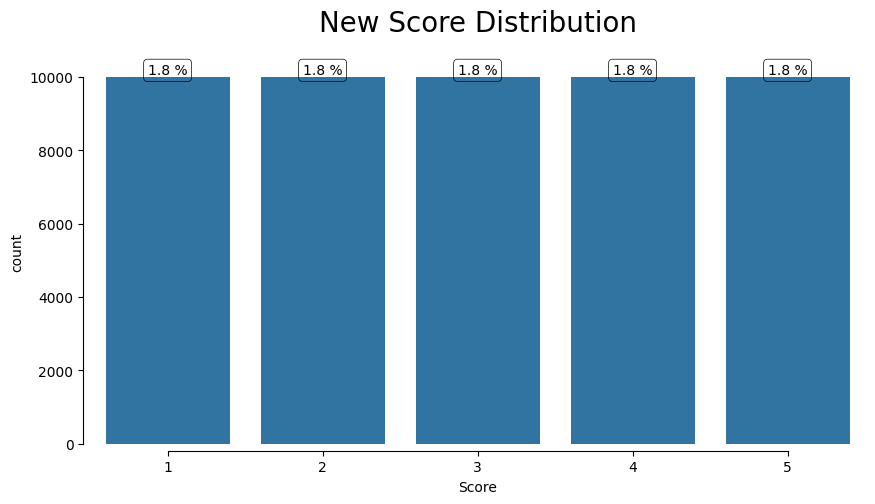

In [ ]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x=new_df['Score'])
total=float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 75,'{:1.1f} %'.format((height/total)*100), ha="center",
           bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
ax.set_title('New Score Distribution', fontsize=20, y=1.05)
sns.despine(right=True)
sns.despine(offset=5, trim=True)

# Text Preprocessing

In [ ]:
import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
stop_words=set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemming=PorterStemmer()

In [ ]:
'''import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('omw-1.4')'''

"import nltk\nnltk.download('wordnet')\nnltk.download('punkt')\nnltk.download('omw-1.4')\nnltk.download('omw-1.4')"

In [ ]:
def clean_text(text):
    # 1. Convert to lower
    txt=text.lower()

    # 1. split to words
    tokens=word_tokenize(text)

    # 2. Remove URLs (if any)
    txt = re.sub(r'http\S+', '', txt)  # Remove URLs

    # 3. Remove HTML tags (if any)
    txt = re.sub(r'<.*?>', '', txt)  # Remove HTML tags

    # 3. remove punctuation
    tokens=[word for word in tokens if word not in string.punctuation]

    # 4. Remove stopwords
    tokens=[word for word in tokens if word not in stop_words]

    # 5. Remove numbers
    tokens=[word for word in tokens if not word.isdigit()]

    # 7. Remove digits
    tokens = [word for word in tokens if not word.isdigit()]

    # 8. Lemmatize the tokens (instead of stemming)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # 9. Join the tokens back into a string
    return ' '.join(tokens)

In [ ]:
new_df['cleaned_text'] = new_df['Text'].apply(clean_text)

In [ ]:
new_df

,ProductId,Score,Summary,Text,Sentiment,cleaned_text
0,B0018CLZBW,1,Dog developed GI problems,Our 6-year old Vizsla has been eating Canidae ...,Negative,Our 6-year old Vizsla eating Canidae year A mo...
1,B00004RAMY,1,Very difficult to set,I bought 2 of these traps and spent an hour tr...,Negative,I bought trap spent hour trying set one I deci...
2,B001CU0N9K,1,Will not buy this product again from Amazon,I purchased this product once before from amaz...,Negative,I purchased product amazon good Welll last pur...
3,B000FA77TW,1,No interior seal !,I used to eat Marmitte when I lived in England...,Negative,I used eat Marmitte I lived England It salty t...
4,B0087GGF62,1,Pikes Place k cups not the same,The Pikes Place Coffee at the Starbucks store ...,Negative,The Pikes Place Coffee Starbucks store favorit...
...,...,...,...,...,...,...
49995,B002L7UYMY,5,Very good seasoning,"This some good sausage seasoning, has a great ...",Positive,This good sausage seasoning great garlic taste...
49996,B000FTU5MY,5,What a difference a little bit of nice salt ma...,We used this salt in the Sydney Seafood School...,Positive,We used salt Sydney Seafood School cooking cla...
49997,B001FA1L9I,5,Very satisfied overall,I placed the order on Feb 9th and received it ...,Positive,I placed order Feb 9th received Feb 11th Very ...
49998,B0000CCZYY,5,addictive.....,"I will come clean to you, here and now, and ad...",Positive,I come clean admit I ONE addiction That addict...


#Show the most common words



In [ ]:
!pip install wordcloud

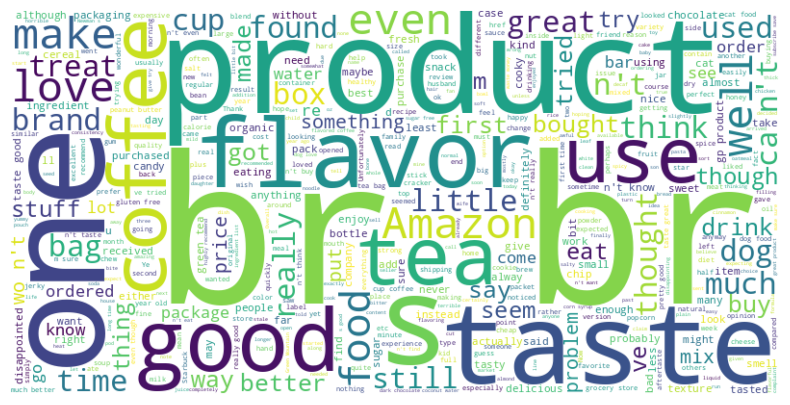

In [ ]:
from wordcloud import WordCloud
all_text=' '.join(new_df['cleaned_text'])



# Create the WordCloud object with the top 1000 words
wordcloud = WordCloud(width=800, height=400, max_words=1000, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
len(set(all_text))

96

In [ ]:
len(all_text)

15746515

#Vectorizing Text to numbers before Modeling

---



In [ ]:
pip install gensim

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#Spliting Data

In [ ]:
new_df['Score'] = new_df['Score'].apply(lambda x: 1 if x >=3 else 0)
# 1 --> Good
#0 --> Bad

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=new_df['cleaned_text']
y=new_df['Score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42,test_size = 0.20)

#Modeling Using ML Models
Logistic Regression

In [ ]:
logistic_pipe=Pipeline(
    [
      ('vec',CountVectorizer(stop_words= "english")),
        ('Tf_idf',TfidfTransformer()),
        ('log_rg',LogisticRegression()),

    ]
)

In [ ]:
log_fit = logistic_pipe.fit(X_train,y_train)

In [ ]:
log_pred=logistic_pipe.predict(X_test)

In [ ]:
print('Training accuracy:', log_fit.score(X_train,y_train))
print('Test accuracy:', log_fit.score(X_test,y_test))

Training accuracy: 0.8462
Test accuracy: 0.8007


<Axes: >

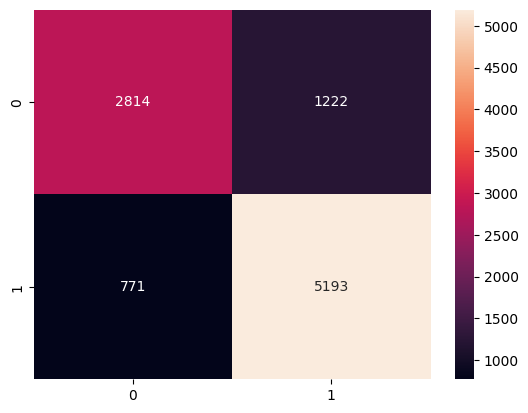

In [ ]:
sns.heatmap(confusion_matrix(y_test,log_pred), annot=True, fmt="d")

Making Predictions

In [ ]:
reviews=['This is an amazing product,I will definetly buy it ',
         'very bad,I dont recommend it at all',
'we received this coffee yesterday, and have to say its amazing',
         'experience was terrible',
         'I will buy again from this site,everything was perfect']
prediction=logistic_pipe.predict(reviews)
sentiment=["Positive" if i == 1 else "Negative" for i in prediction]

print(sentiment)
# it should be P,N,P,N,P
# We got 3/5 correct

['Positive', 'Negative', 'Positive', 'Negative', 'Positive']


#Naive Bayes

              precision    recall  f1-score   support

           0     0.8626    0.4061    0.5522      4036
           1     0.7041    0.9562    0.8110      5964

    accuracy                         0.7342     10000
   macro avg     0.7834    0.6812    0.6816     10000
weighted avg     0.7681    0.7342    0.7066     10000



<Axes: >

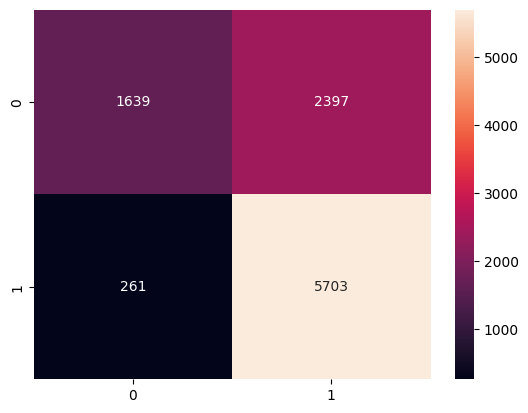

In [ ]:
naive_bayes_pipeline = Pipeline([
    ('vec', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

# Train the model
nb_model = naive_bayes_pipeline.fit(X_train, y_train)
y_pred_nb = naive_bayes_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_nb,digits=4))
sns.heatmap(confusion_matrix(y_test,y_pred_nb), annot=True, fmt="d")

In [ ]:
print('Training accuracy of Navie Bayes : ', nb_model.score(X_train,y_train))
print('Test accuracy of Navie Bayes : ', nb_model.score(X_test,y_test))

Training accuracy of Navie Bayes :  0.777175
Test accuracy of Navie Bayes :  0.7342


#SVM

In [ ]:
svm_pipeline = Pipeline([
    ('vec', CountVectorizer(stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('classifier', SVC())
])

# Train the model
svc = svm_pipeline.fit(X_train, y_train)
y_pred_svc = svm_pipeline.predict(X_test)
print(classification_report(y_test, y_pred_svc,digits=4))

              precision    recall  f1-score   support

           0     0.7994    0.6379    0.7096       406
           1     0.7825    0.8906    0.8331       594

    accuracy                         0.7880      1000
   macro avg     0.7910    0.7643    0.7713      1000
weighted avg     0.7894    0.7880    0.7829      1000



<Axes: >

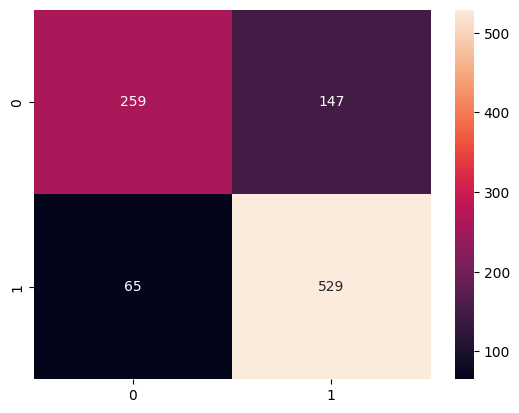

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred_svc), annot=True, fmt="d")

In [ ]:
print('Training accuracy of SVC : ', svc.score(X_train,y_train))
print('Test accuracy of SVC : ', svc.score(X_test,y_test))

Training accuracy of SVC :  0.988
Test accuracy of SVC :  0.788


Making Predictions

In [ ]:
reviews=['This is an amazing product,I will definetly buy it ',
         'very bad,I dont recommend it at all',
'we received this coffee yesterday, and have to say its amazing',
         'experience was terrible',
         'I will buy again from this site,everything was perfect']
prediction=svm_pipeline.predict(reviews)
sentiment=["Positive" if i == 1 else "Negative" for i in prediction]

print(sentiment)
# it should be P,N,P,N,P
# we got 3/5 correct

['Negative', 'Negative', 'Negative', 'Negative', 'Positive']


#Modeling Using Recurrent Neural Network Models

Applying LSTM on Text column

In [ ]:
new_df['Score']

,Score
0,0
1,0
2,0
3,0
4,0
...,...
49995,1
49996,1
49997,1
49998,1


In [ ]:
new_df['Text']

,Text
0,Our 6-year old Vizsla has been eating Canidae ...
1,I bought 2 of these traps and spent an hour tr...
2,I purchased this product once before from amaz...
3,I used to eat Marmitte when I lived in England...
4,The Pikes Place Coffee at the Starbucks store ...
...,...
49995,"This some good sausage seasoning, has a great ..."
49996,We used this salt in the Sydney Seafood School...
49997,I placed the order on Feb 9th and received it ...
49998,"I will come clean to you, here and now, and ad..."


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras import regularizers

In [ ]:
reviews=new_df['Text'].values
sentiments=new_df['Score'].values

# Apply tokenization
tokenizer=Tokenizer(num_words=20000)
tokenizer.fit_on_texts(reviews)
sequences=tokenizer.texts_to_sequences(reviews)

# Padding sequences on reviews to have same length
max_len = 150  # Adjusted max length as reviews are longer
# X as input
X = pad_sequences(sequences, maxlen=max_len)

# Convert sentiments to numpy array
y = np.array(sentiments)

In [ ]:
print(reviews)

['Our 6-year old Vizsla has been eating Canidae for 3 years. A month ago we switched flavors from Bison to Sea Salmon.  We gradually transitioned the change even though it was the same company.  Within four weeks on the new flavor he developed a set of distressing systems including soft, mucus covered stools, horrible gas,low energy, staggering walk, excessive drooling, licking and constant neck extending (difficulty swallowing).  A vet visit confirmed these as diet related.  We put him on a chicken/rice diet and his symptoms stopped after just two days.  Doing research to decide whether to switch back to bison or go with another company, I found a great deal of  information about other pet owners having issues with all flavors of food from Canidae. Consumer Affairs reports a pending class action suit.  We have decided to switch to another company.'
 'I bought 2 of these traps and spent an hour trying to set one of them.  I have decided the trigger mechanism must have been installed wr

In [ ]:
print(sequences[:5])

[[138, 265, 353, 193, 13897, 52, 89, 227, 1514, 12, 124, 247, 3, 481, 492, 59, 1076, 162, 42, 5101, 5, 1168, 901, 59, 4298, 5701, 1, 583, 79, 165, 6, 17, 1, 144, 317, 810, 560, 543, 25, 1, 237, 40, 112, 2356, 3, 876, 7, 5414, 940, 485, 10031, 1322, 2205, 598, 1037, 314, 464, 17441, 2101, 2538, 10032, 2565, 4, 3209, 3831, 11165, 3832, 4460, 3, 776, 2690, 3763, 28, 22, 287, 2834, 59, 218, 325, 25, 3, 232, 327, 287, 4, 279, 2325, 939, 82, 34, 121, 342, 782, 933, 5, 2018, 1100, 5, 976, 176, 5, 5101, 35, 148, 18, 202, 317, 2, 130, 3, 57, 461, 7, 964, 62, 58, 580, 2060, 346, 778, 18, 41, 162, 7, 54, 42, 1514, 1867, 10033, 4400, 3, 10570, 2254, 3732, 4063, 59, 19, 393, 5, 976, 5, 202, 317], [2, 115, 103, 7, 28, 2523, 4, 1515, 72, 960, 289, 5, 876, 37, 7, 32, 2, 19, 393, 1, 4969, 7093, 451, 19, 89, 8194, 489, 48, 6, 17, 119, 56, 125, 10, 203, 49, 245, 672, 32, 176, 49, 81, 202, 477, 160, 428, 78, 274], [2, 246, 10, 33, 363, 146, 42, 74, 4, 6, 17, 30, 15285, 1, 257, 281, 7, 10, 33, 17, 128, 1, 

Split the data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define LSTM Parameters
voca_size=20000  # as input
embedding_size=200  # as output

In [ ]:
model=Sequential()
model.add(Embedding(input_dim=voca_size,output_dim=embedding_size,input_length=max_len))
model.add(LSTM(256,recurrent_dropout=0.3,dropout=0.3))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)))

In [ ]:
import tensorflow as tf

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

model_checkpoint = ModelCheckpoint(
    'best_model1.keras',  # File path where the model will be saved
    monitor='val_loss',  # Metric to monitor
    save_best_only=True,  # Save only the model with the best validation loss
    mode='min',  # 'min' because lower loss is better
    verbose=1
)

# Train the LSTM model
history1=model.fit(X_train, y_train,
          epochs=12,
          batch_size=128,
          validation_data=(X_test, y_test)
          , callbacks=[early_stopping,model_checkpoint])

Epoch 1/3
 54/313 ━━━━━━━━━━━━━━━━━━━━ 6:14 1s/step - accuracy: 0.6960 - loss: 0.6044

#Show Trainning and Validation Accuracy & Loss

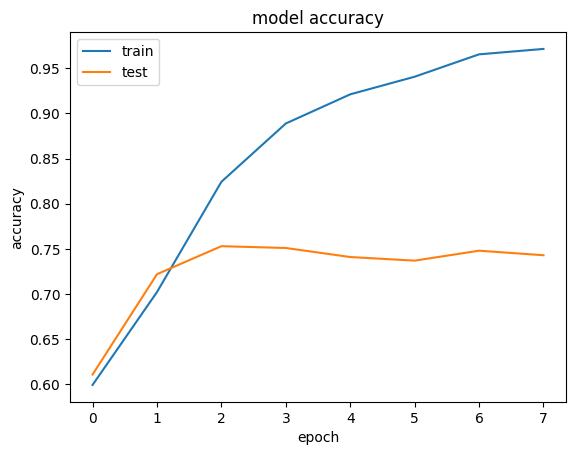

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

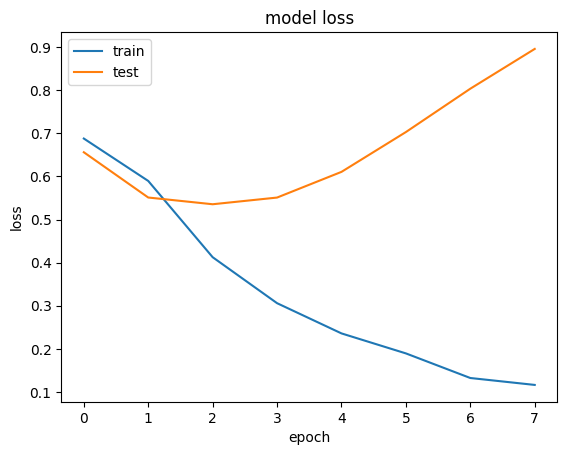

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

# Print the final accuracy
print(f"Final Test Accuracy: {accuracy * 100:.2f}%")

32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 215ms/step - accuracy: 0.7531 - loss: 0.8660
Final Test Accuracy: 74.30%


Apply LSTM on Text and Summary Column after Combinning them into 1 New_Text column

In [ ]:
new_df['New_Text']=df['Summary']+' '+new_df['Text']
new_df['New_Text']

,New_Text
0,Good Quality Dog Food Boo to this. I was SO h...
1,Not as Advertised Read the packages carefully ...
2,"""Delight"" says it all I was excited to find th..."
3,"Cough Medicine Not very happy with this one, w..."
4,Great taffy I recently purchased a box of this...
...,...
4995,The cavemen must have been wealthy The Lavazza...
4996,These cookies need work; you can make your own...
4997,Okay in a pinch - not great One tbsp of Wholes...
4998,"they are good (except for the ""rainforest"" fla..."


In [ ]:
# Convert all entries to string and replace NaNs with empty stringsreviews2=new_df['New_Text'].values
reviews2 = new_df['Text'].astype(str).fillna('')
sentiments2=new_df['Score'].values

# Apply tokenization
tokenizer=Tokenizer(num_words=20000)
tokenizer.fit_on_texts(reviews2)
sequences=tokenizer.texts_to_sequences(reviews2)

# Padding sequences on reviews to have same length
max_len = 150  # Adjusted max length as reviews are longer
# X as input
X = pad_sequences(sequences, maxlen=max_len)

# Convert sentiments to numpy array
y = np.array(sentiments2)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define LSTM Parameters
voca_size=20000  # as input
embedding_size=200  # as output

In [ ]:
model=Sequential()
model.add(Embedding(input_dim=voca_size,output_dim=embedding_size,input_length=max_len))
model.add(LSTM(256,recurrent_dropout=0.3,dropout=0.3))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)))

In [ ]:
# Compile the model
import tensorflow as tf
op=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=op, loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

model_checkpoint = ModelCheckpoint(
    'best_model2.keras',  # File path where the model will be saved
    monitor='val_loss',  # Metric to monitor
    save_best_only=True,  # Save only the model with the best validation loss
    mode='min',  # 'min' because lower loss is better
    verbose=1  # Verbosity mode
)

# Train the LSTM model
history2=model.fit(X_train, y_train,
          epochs=12,
          batch_size=128,
          validation_data=(X_test, y_test)
          , callbacks=[early_stopping,model_checkpoint])

Epoch 1/12
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5959 - loss: 0.6971
Epoch 1: val_loss improved from inf to 0.65705, saving model to best_model2.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.5963 - loss: 0.6968 - val_accuracy: 0.6350 - val_loss: 0.6570
Epoch 2/12
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6788 - loss: 0.5990
Epoch 2: val_loss improved from 0.65705 to 0.53609, saving model to best_model2.keras
32/32 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.6797 - loss: 0.5980 - val_accuracy: 0.7240 - val_loss: 0.5361
Epoch 3/12
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8172 - loss: 0.4380
Epoch 3: val_loss did not improve from 0.53609
32/32 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.8175 - loss: 0.4375 - val_accuracy: 0.7380 - val_loss: 0.5441
Epoch 4/12
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8813 - loss: 0.3217
Epoch 4: val_loss did not improve from 0.53609
32/32 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.8813 - l

#Show Trainning and Validation Accuracy & Loss

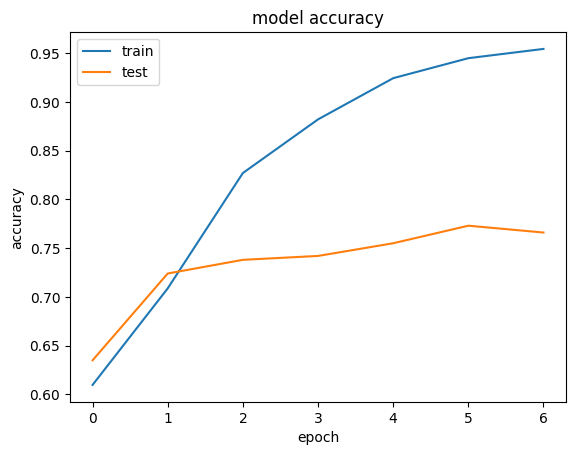

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

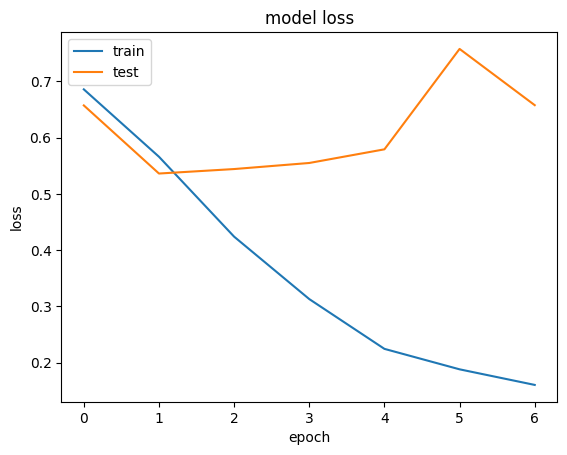

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)


print(f"Final Test Accuracy: {accuracy * 100:.2f}%")

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 169ms/step - accuracy: 0.7766 - loss: 0.6397
Final Test Accuracy: 76.60%


#Conclusion:
LSTM gives highest accuracy which is 76.60 % with a model which operates only on the Text Column